# Filter posts on the reddit related to the 2016 U.S. presidential election

python=3.7.16

2016 POTUS Election（time：October 1 to December 31, 2016)

All data sets analysis

In [1]:
import pandas as pd
from joblib import Parallel, delayed  # parallel computing
from joblib import dump, load
import warnings
warnings.filterwarnings('ignore')

In [43]:
import sys
sys.version

'3.7.16 (default, Jan 17 2023, 22:20:44) \n[GCC 11.2.0]'

# Topic & debunking keywords

In [3]:
# topic key words filtering
keywords_English = ["MAGA", "MakeAmericaGreatAgain", "Trump", "AmericaFirst", "Make America Great Again", \
             "Hillary", "Clinton", "ImWithHer", "OHHillYes", \
             "election2016", "elections2016", "debates2016"]

In [4]:
db_df = pd.read_csv("/mnt/data/wenlu/new—program/data/(Merge_ver3)debunking_fact-checking_sites.csv")
db_df = db_df.dropna(subset=['domain'])
db_df_domain = db_df['domain'].to_list()
db_df_name = db_df['name'].to_list()

In [5]:
# topic key words filtering
db_keywords_English = ["fact check", "fact-checking", "fact checker", "fact checkers", "fake news", "misinformation", "disinformation", "debunkers", "debunker", "debunking", "debunking", "debunk"]
# add the debunk domain
db_keyword_English_contains_domain = (db_keywords_English + db_df_domain + db_df_name)

In [18]:
len(db_keyword_English_contains_domain)

102

# Filter data by month

In [6]:
df_10 = pd.read_csv("/mnt/data/reddit/reddit/RC/RC_2016-10.zst.csv",usecols = ['created_utc','author','parent_id','id','body'])

In [7]:
df_10 = df_10.dropna(subset=['body'])

In [8]:
%%time
# Topic Keyword Filtering for October '16
df_10_topic_key = df_10[df_10['body'].str.contains('|'.join(keywords_English), case=False)]  # keywords searching in the body text
df_10_topic_key.sort_index(axis=0, ascending=True, inplace=True)  # Restore posting order
df_10_topic_key.drop_duplicates(subset='author', keep='first', inplace=True)  # drop duplicates


CPU times: user 28min 29s, sys: 4.42 s, total: 28min 33s
Wall time: 28min 34s


In [9]:
df_11 = pd.read_csv("/mnt/data/reddit/reddit/RC/RC_2016-11.zst.csv",usecols = ['created_utc','author','parent_id','id','body'])
df_11 = df_11.dropna(subset = ['body'])

In [10]:
# Topic Keyword Filtering for November '16
df_11_topic_key = df_11[df_11['body'].str.contains('|'.join(keywords_English), case=False)]  # keywords searching in the body text
df_11_topic_key.sort_index(axis=0, ascending=True, inplace=True)  # Restore posting order
df_11_topic_key.drop_duplicates(subset='author', keep='first', inplace=True)  # drop duplicates

In [11]:
df_12 = pd.read_csv("/mnt/data/reddit/reddit/RC/RC_2016-12.zst.csv",usecols = ['created_utc','author','parent_id','id','body'])
df_12 = df_12.dropna(subset = ['body'])

In [ ]:
# Topic Keyword Filtering for December '16
df_12_topic_key = df_12[df_12['body'].str.contains('|'.join(keywords_English), case=False)]  # keywords searching in the body text
df_12_topic_key.sort_index(axis=0, ascending=True, inplace=True)  # Restore posting order
df_12_topic_key.drop_duplicates(subset='author', keep='first', inplace=True)  # drop duplicates


In [13]:
df_12_topic_key.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223461 entries, 54 to 72942364
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_utc  223461 non-null  object
 1   author       223461 non-null  object
 2   body         223461 non-null  object
 3   parent_id    223461 non-null  object
 4   id           223461 non-null  object
dtypes: object(5)
memory usage: 10.2+ MB


In [15]:
df_10_topic_key.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240214 entries, 91 to 71825555
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_utc  240214 non-null  object
 1   author       240214 non-null  object
 2   body         240214 non-null  object
 3   parent_id    240214 non-null  object
 4   id           240214 non-null  object
dtypes: object(5)
memory usage: 11.0+ MB


In [18]:
df_11_topic_key.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349588 entries, 24 to 71021226
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_utc  349588 non-null  object
 1   author       349588 non-null  object
 2   body         349588 non-null  object
 3   parent_id    349588 non-null  object
 4   id           349588 non-null  object
dtypes: object(5)
memory usage: 16.0+ MB


In [16]:
df_list = [df_10_topic_key, df_11_topic_key, df_12_topic_key]

all_data = pd.concat(df_list)

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813263 entries, 91 to 72942364
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_utc  813263 non-null  object
 1   author       813263 non-null  object
 2   body         813263 non-null  object
 3   parent_id    813263 non-null  object
 4   id           813263 non-null  object
dtypes: object(5)
memory usage: 37.2+ MB


# language detatection

In [19]:
df=all_data.query("author !='[deleted]'")
df=df.query("author !='[removed]'")
df=df.query("body!='[removed]'")
df=df.query("body!='[removed]'")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813260 entries, 91 to 72942364
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_utc  813260 non-null  object
 1   author       813260 non-null  object
 2   body         813260 non-null  object
 3   parent_id    813260 non-null  object
 4   id           813260 non-null  object
dtypes: object(5)
memory usage: 37.2+ MB


In [26]:
pwd

'/mnt/data/wenlu/16+20-election-data/2rd+16election'

In [27]:
df.to_csv('usa16_reddit_all[time=16.10-16.12].csv')

In [28]:
from langdetect import detect
from tqdm import tqdm
tqdm.pandas(desc='bar')

def detectlang(x):
    try:
        return (detect (x))
    except:
        return ''

from joblib import Parallel, delayed

lst=Parallel(n_jobs=150)(delayed(detectlang)(x) for x in tqdm(df['body']))

df['lang']=lst


100%|██████████| 813260/813260 [31:03<00:00, 436.42it/s]


In [29]:
df.to_csv('/mnt/data/wenlu/16+20-election-data/2rd+16election/16election[time=16.10-16.12]_lang_tect.csv',index=None)

In [30]:
# check the number of language types
unique_lang_count = df['lang'].value_counts()
unique_lang_count

en       774791
de         3868
vi         2981
           2838
ro         2525
it         2457
tl         2243
fr         2059
id         1863
no         1790
pt         1783
es         1533
da         1489
nl         1285
sv         1191
af         1159
sw         1032
hu          946
et          788
so          753
ca          646
fi          644
pl          438
tr          412
hr          381
lv          357
cy          320
lt          125
sl          123
ja          108
sq           88
el           71
sk           60
cs           41
ru           36
bg           11
uk            8
ko            3
hi            3
zh-cn         3
th            2
kn            2
mk            2
fa            1
ta            1
Name: lang, dtype: int64

# English data analysis

In [31]:
df_en = df[df['lang'] == 'en']
#df_en.to_csv('/mnt/data/wenlu/16+20-election-data/2rd+16election/16election_rcdata[lang=en][time=16.10-16.12].csv')

In [32]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 774791 entries, 91 to 72942364
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   created_utc  774791 non-null  object
 1   author       774791 non-null  object
 2   body         774791 non-null  object
 3   parent_id    774791 non-null  object
 4   id           774791 non-null  object
 5   lang         774791 non-null  object
dtypes: object(6)
memory usage: 41.4+ MB


In [37]:
%%time
# debunk keywords filt
df_en_db_key = df_en[df_en['body'].str.contains('|'.join(db_keyword_English_contains_domain), case=False)]  # keywords searching in the body text
df_en_db_key.sort_index(axis=0, ascending=True, inplace=True)  # Restore posting order
df_en_db_key.drop_duplicates(subset='author', keep='first', inplace=True)  # drop duplicates
#dump(df_en_db_key,"../16+20-election-data/2rd+16election/pkl/16election_debunk_[lang=en][time=16.10-16.12].pkl")

CPU times: user 5min 10s, sys: 132 ms, total: 5min 10s
Wall time: 5min 10s


In [38]:
df_en_db_key.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 54 to 72867361
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_utc  9658 non-null   object
 1   author       9658 non-null   object
 2   body         9658 non-null   object
 3   parent_id    9658 non-null   object
 4   id           9658 non-null   object
 5   lang         9658 non-null   object
dtypes: object(6)
memory usage: 528.2+ KB


# Daily user slice profiles

In [33]:
from joblib import Parallel, delayed  # parallel computing
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# show all columns in the DataFrame
pd.set_option('display.max_columns', None)
# fully display the content in displayed table cells
pd.set_option('display.max_colwidth', None)

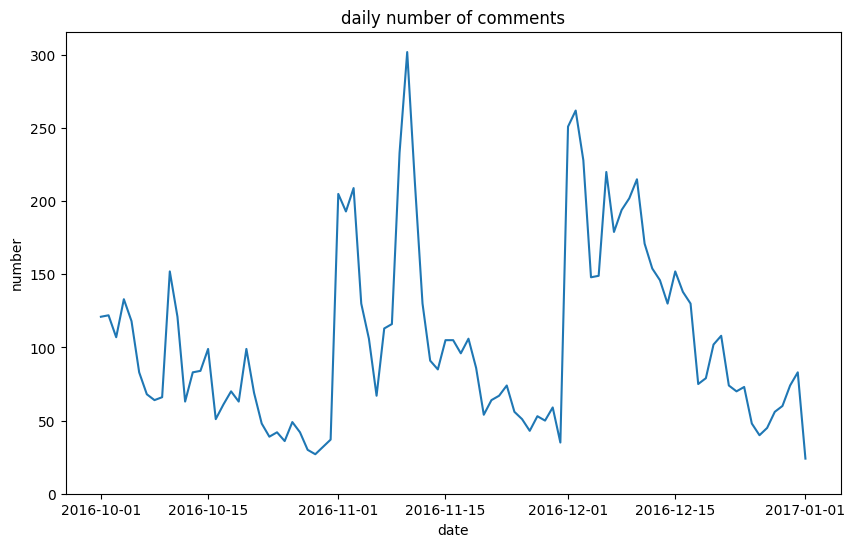

In [39]:
# Make a chart of the number of posts by day
# def func(path):
#df = pd.read_csv('20election/20election_db_[lang=en][time=20.10_20.11_20.12.csv')

df_en_db_key['created_utc'] = pd.to_datetime(df_en_db_key['created_utc'], format='%Y-%m-%d %H:%M:%S',errors='coerce')
df_en_db_key.drop_duplicates(subset=['body'], inplace=True)
df_en_db_key['date'] = df_en_db_key['created_utc'].dt.date  # Create a new column containing only the data information

# Create a date range from the earliest post date to the latest post date
date_range = pd.date_range(start=df_en_db_key['date'].min(), end=df_en_db_key['date'].max())
# Grouping of dates and calculation of the size of each group (i.e., number of data entries per day)
daily_counts = df_en_db_key.groupby('date').size()  
# Use the reindex function to fill in the missing dates 
# Set the number of posts to 0 for the missing dates
daily_counts = daily_counts.reindex(date_range, fill_value=0)

plt.figure(figsize=(10, 6))

sns.lineplot(data=daily_counts)

plt.title('daily number of comments')
plt.ylim((0,None))
plt.xlabel('date')
plt.ylabel('number')
plt.show()

In [24]:
pwd

'/mnt/data/wenlu/16+20-election-data/2rd+16election'

In [32]:
df.head(10)

,Unnamed: 0,created_utc,author,body,parent_id,id,lang
0,1100,2016-10-01 08:00:32,john-14-6,"&gt; About #3, doesn't that run the risk of ad hominem and prejudice,\nrather than considering the merits (or non-merits) of the position that person holds?\n\n\nThere's plenty of places in both the old and new testaments where we are instructed to avoid false teachers -- this doesn't only mean false teach-ings, but teach-ers. Admittedly this might be more related to application (a false teacher will mainly tell you to apply true doctrine in an untrue manner) than actual theology, which your question relates to.\n\nA very stark example is a teaching coming from the Richard Dawkins Foundation for Science and Reason compared to one coming from e.g. John Piper. Even if both offer an explanation that's textually and logically sound, credence should be given to the faithful believer rather than those who openly wage war against God.\n\n&gt; is the past popularity or non-popularity relevant to whether a position is within orthodoxy or is heretical? Some popularly-held positions may be false while less-popularly-held positions may be true.\n\nI would say relevant but not necessarily decisive. It's important to understand why people understood what they did; though we're not forced to agree with it. Specifically, we need to uncover the biblical truth (if any) which would be the underlying reason for a specific custom or teaching. I don't know who I'll trigger, but consider the EFS hierarchy-in-trinity discussion. Christianity - neither Catholic nor Protestant, has really dared venture and discuss and make assumptions about the character or nature of the trinity; it's mostly been a bunch of negative statements.",t1_d88x9ps,d88zqyp,en
1,1720,2016-10-01 08:00:51,Iwonttakeitanymore,"Logically, I understand what you are saying, but there's a small little voice that keeps saying if I miss a run for whatever reason I am in some way a failure. Silly, I know.\n\nIf I skip it tomorrow, I can always run it on Sunday too. If not then I could make my 14 the 18. \n\nEDIT: Ok, reason and logic prevailed. Tomorrow is a rest day.",t1_d88yjar,d88zrg2,en
2,2446,2016-10-01 08:01:15,kromaticorb,"CO2 has diminishing returns as far as heat retention. If 50 ppm increased temp by 1, you would need 150 ppm to increase to 2, and 300 ppm for 3. And the temp increase is not yearly. 50 ppm would, after 1 year or 5 years, only increase the temp by 1 degree. If what you were saying is true, it would be 150 degrees at least outside right now.\n\n&amp;nbsp;\n\nAre we really dramatically altering our climate? The true answer is: the evidence is inconclusive so far. Despite the claims and computer created models, none of it had been accurate.\n\n&amp;nbsp;\n\nCO2 levels were over 3000 ppm during an ice age. Why was the temp not ridiculously high? Why was the ice still forming?\n\n&amp;nbsp;\n\nI love the skepticalscience.com website. Not because they post accurate information, but because people challenge the biased charts and statements they make. Much more is learned by understanding the information than by blindly believing and then regurgitating misinformation.\n\n&amp;nbsp;\n\nI am not denying climate change is a possibility. I am not even denying humans have an impact. I am however, challenging the extent of our impact.\n\n&amp;nbsp;\n\nI find it very one sided that only scientist's that are pro anthropogenic climate change get funding. Any one who challenges or tries to correct Sara and computer models are silenced. Something to think about.",t1_d88yeii,d88zs0a,en
3,2447,2016-10-01 08:01:15,gh057,"If assault is OK because the people are charged up, then logically so is property damage. Condone assault, condone rioting. Same excuse.",t1_d88ffmo,d88zs0b,en
4,3443,2016-10-01 08:01:47,[deleted],yeah just have to laugh it off since you cant logically defend it. GG,t1_d88yez3,d88zss5,en
5,3623,2016-10-01 08:01:54,Fresh_C,Gotcha. I'm just not 100% convince that the event he was t

In [33]:
df['created_utc'].isnull().any()

False